In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm

In [3]:
from australian_housing import paths

In [4]:
ts = pd.read_csv(paths.manager.processed_data_file, index_col=0, parse_dates=[0])

In [5]:
def encode_dates(dt):
    return pd.to_timedelta(dt).total_seconds()/365/24/60/60 + 1970

In [6]:
t = encode_dates(ts.index.values)

In [7]:
model = sm.OLS(ts.Value, sm.add_constant(t))

In [8]:
model_fit = model.fit()
model_fit.params

const   -450582.495290
x1          224.663929
dtype: float64

In [9]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     138.1
Date:                Fri, 07 Dec 2018   Prob (F-statistic):           2.58e-18
Time:                        14:02:32   Log-Likelihood:                -515.72
No. Observations:                  73   AIC:                             1035.
Df Residuals:                      71   BIC:                             1040.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.506e+05   3.85e+04    -11.698      0.000   -5.27e+05   -3.74e+05
x1           224.6639     19.120     11.750      0.000     186.540     262.788
==============================================================================
Omnibus:                       11.462   Durbin-Watson:                   1.401
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.231
Skew:                          -0.804   Prob(JB):                      0.00221
Kurtosis:                       4.198   Cond. No.                     2.31e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

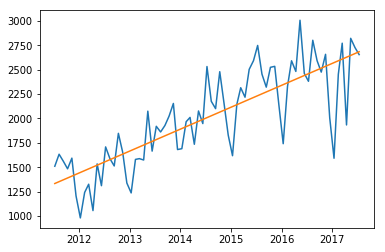

In [15]:
plt.plot(t, ts.Value.values)
plt.plot(t, model_fit.predict(sm.add_constant(t)));

In [11]:
t_all = encode_dates(pd.date_range(ts.index[0], '2020-07-01', freq='M').values)

In [25]:
res = model_fit.get_prediction(sm.add_constant(t_all))
resf = res.summary_frame(alpha=0.05)
resf.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1352.694785,65.204547,1222.680612,1482.708959,765.759741,1939.629830
1,1371.775831,63.818306,1244.525743,1499.025919,785.446874,1958.104789
2,1390.241360,62.487682,1265.644460,1514.838260,804.482494,1976.000226
3,1409.322406,61.124720,1287.443176,1531.201635,824.135591,1994.509220
4,1427.787934,59.818129,1308.513973,1547.061895,843.138177,2012.437692


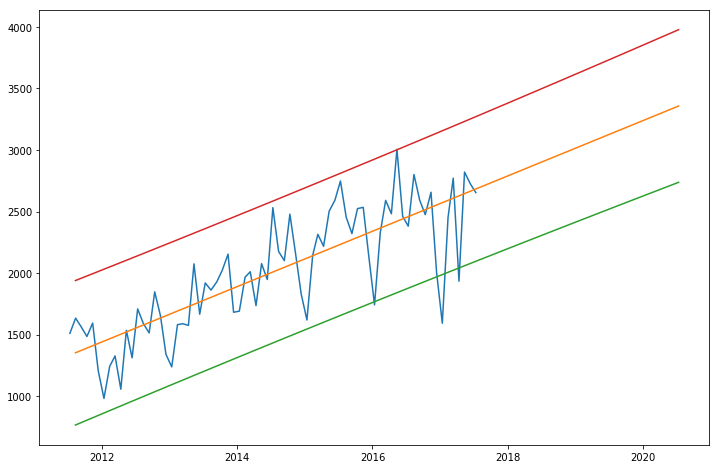

In [26]:
plt.figure(figsize=(12,8))
plt.plot(t, ts.Value.values, )
plt.plot(t_all, resf['mean']);
plt.plot(t_all, resf['obs_ci_lower']);
plt.plot(t_all, resf['obs_ci_upper']);